In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/MyDrive/DRUG Analysis training'

/content/gdrive/MyDrive/DRUG Analysis training


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import os

def read_multiple_faers_xml(files_list):
    """
    Reads multiple FAERS XML files and combines them into a single DataFrame.

    Args:
        files_list (list): List of FAERS XML file paths.

    Returns:
        DataFrame: Combined FAERS data from all XML files.
    """
    all_data = []

    for file_path in files_list:
        try:
            # Parse XML file
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Extract data from each file
            for safety_report in root.findall('safetyreport'):
                report_id = safety_report.find('safetyreportid').text if safety_report.find('safetyreportid') is not None else None
                country = safety_report.find('primarysource/reportercountry').text if safety_report.find('primarysource/reportercountry') is not None else None
                report_date = safety_report.find('receiptdate').text if safety_report.find('receiptdate') is not None else None

                # Patient information
                patient = safety_report.find('patient')
                if patient is not None:
                    drugs = patient.findall('drug')
                    reactions = patient.findall('reaction')

                    # Extract all drugs and reactions
                    for drug in drugs:
                        drug_name = drug.find('medicinalproduct').text if drug.find('medicinalproduct') is not None else None
                        indication = drug.find('drugindication').text if drug.find('drugindication') is not None else None

                        for reaction in reactions:
                            reaction_text = reaction.find('reactionmeddrapt').text if reaction.find('reactionmeddrapt') is not None else None

                            # Append extracted data
                            all_data.append({
                                'safetyreport_id': report_id,
                                'country': country,
                                'report_date': report_date,  # Added Timestamp
                                'drug': drug_name,
                                'indication': indication,
                                'reaction': reaction_text
                            })
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")

    # Convert to DataFrame
    combined_df = pd.DataFrame(all_data)

    # Convert 'report_date' to datetime format
    combined_df['report_date'] = pd.to_datetime(combined_df['report_date'], errors='coerce')

    return combined_df


In [ ]:
# Example Usage: Provide a list of FAERS XML files
faers_xml_files = [
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2023Q3/XML/1_ADR23Q3.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2023Q3/XML/2_ADR23Q3.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2023Q3/XML/3_ADR23Q3.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2023Q4/XML/1_ADR23Q4.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2023Q4/XML/2_ADR23Q4.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2023Q4/XML/3_ADR23Q4.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2023q1/XML/1_ADR23Q1.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2023q1/XML/2_ADR23Q1.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2023q1/XML/3_ADR23Q1.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2023q2/XML/1_ADR23Q2.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2023q2/XML/2_ADR23Q2.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2023q2/XML/3_ADR23Q2.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2024q1/XML/1_ADR24Q1.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2024q1/XML/2_ADR24Q1.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2024q1/XML/3_ADR24Q1.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2024q2/XML/1_ADR24Q2.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2024q2/XML/2_ADR24Q2.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2024q2/XML/3_ADR24Q2.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2024q3/XML/1_ADR24Q3.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2024q3/XML/2_ADR24Q3.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2024q3/XML/3_ADR24Q3.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2024Q4/XML/1_ADR24Q4.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2024Q4/XML/2_ADR24Q4.xml",
    "/content/gdrive/MyDrive/DRUG Analysis training/faers_xml_2024Q4/XML/3_ADR24Q4.xml",


]

# Read and combine all FAERS XML files
df = read_multiple_faers_xml(faers_xml_files)



# Save cleaned FAERS data with timestamps
df.to_csv("/content/gdrive/MyDrive/DRUG Analysis training/FAERS.csv", index=False)
df = pd.read_csv("/content/gdrive/MyDrive/DRUG Analysis training/FAERS.csv")
df.head(-1)

In [ ]:
df_Train = pd.read_csv("/content/gdrive/MyDrive/DRUG Analysis training/FAERS.csv")
df_Train.head(-1)

<ipython-input-15-564c10fc5e66>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Train = pd.read_csv("/content/gdrive/MyDrive/DRUG Analysis training/FAERS.csv")


,safetyreport_id,country,report_date,drug,indication,reaction
0,22723993,US,2023-07-19,REVLIMID,Plasma cell myeloma,Hypoaesthesia
1,22736298,US,2023-07-21,XGEVA,Metastases to bone,Rash
2,22736298,US,2023-07-21,IBRANCE,Breast cancer metastatic,Rash
3,22765280,DE,2023-07-31,CEFUROXIME AXETIL,Bacterial infection,Swollen tongue
4,22765280,DE,2023-07-31,CEFUROXIME AXETIL,Bacterial infection,Hypoaesthesia oral
...,...,...,...,...,...,...
174841101,24805319,US,2024-12-24,FENTANYL,NaN,Suicide attempt
174841102,24805319,US,2024-12-24,FENTANYL,NaN,Drug screen positive
174841103,24830572,US,2024-12-27,ENBREL,Rheumatoid arthritis,Therapy interrupted
174841104,24830572,US,2024-12-27,ENBREL,Rheumatoid arthritis,COVID-19


In [ ]:
df_Train["report_date"] = pd.to_datetime(df_Train["report_date"])

df_Train["drug"] = df_Train["drug"].str.upper()

faers_time_series = (
    df_Train.groupby([pd.Grouper(key="report_date", freq="M"), "drug"])["reaction"]
    .count()
    .reset_index()
)


faers_time_series.rename(columns={"reaction": "event_count"}, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

faers_pivot = faers_time_series.pivot(index="report_date", columns="drug", values="event_count").fillna(0)

scaler = MinMaxScaler()
faers_scaled = scaler.fit_transform(faers_pivot)

faers_scaled_df = pd.DataFrame(faers_scaled, columns=faers_pivot.columns, index=faers_pivot.index)

faers_scaled_df.to_csv('/content/gdrive/MyDrive/DRUG Analysis training/faers_scaled_df.csv')
faers_scaled_df = pd.read_csv('/content/gdrive/MyDrive/DRUG Analysis training/faers_scaled_df.csv')

In [ ]:
import pandas as pd

faers_scaled_df = pd.read_csv('/content/gdrive/MyDrive/DRUG Analysis training/faers_scaled_df.csv')
faers_scaled_df = faers_scaled_df.apply(pd.to_numeric, errors='coerce')
faers_scaled_df = faers_scaled_df.fillna(0)
print(faers_scaled_df.dtypes)


report_date                                                               float64
(6S)-5-METHYLTETRAHYDROFOLATE GLUCOSAMINE;ACETYLCYSTEINE;MECOBALAMIN;P    float64
(6S)-5-METHYLTETRAHYDROFOLATE GLUCOSAMINE;CALCIUM CARBONATE;COLECALCIF    float64
(6S)-5-METHYLTETRAHYDROFOLATE, ASCORBIC ACID, BETACAROTENE, BIOTIN, BO    float64
(6S)-5-METHYLTETRAHYDROFOLATE;COLECALCIFEROL;CYANOCOBALAMIN;FOLIC ACID    float64
                                                                           ...   
^SOMETHING GLYCINATE^                                                     float64
^TON^ OF UNSPECIFIED MEDICATIONS (SHE COULD NOT RECALL ALL)               float64
_DEXAMETHASONE                                                            float64
{NO MATCH FOUND}                                                          float64
|ISINOPRI| 5 MG                                                           float64
Length: 98963, dtype: object


Using device: cpu


<ipython-input-4-4318e965d87a>:19: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  return torch.tensor(sequences, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32)
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100, Training Loss: 0.39789, Validation Loss: 0.37034
Epoch 2/100, Training Loss: 0.36435, Validation Loss: 0.29865
Epoch 3/100, Training Loss: 0.29455, Validation Loss: 0.24579
Epoch 4/100, Training Loss: 0.24448, Validation Loss: 0.20424
Epoch 5/100, Training Loss: 0.20100, Validation Loss: 0.17163
Epoch 6/100, Training Loss: 0.16736, Validation Loss: 0.14581
Epoch 7/100, Training Loss: 0.13952, Validation Loss: 0.12464
Epoch 8/100, Training Loss: 0.11878, Validation Loss: 0.10822
Epoch 9/100, Training Loss: 0.10047, Validation Loss: 0.09662
Epoch 10/100, Training Loss: 0.08859, Validation Loss: 0.08866
Epoch 11/100, Training Loss: 0.07983, Validation Loss: 0.08329
Epoch 12/100, Training Loss: 0.07430, Validation Loss: 0.08002
Epoch 13/100, Training Loss: 0.07010, Validation Loss: 0.07803
Epoch 14/100, Training Loss: 0.06715, Validation Loss: 0.07667
Epoch 15/100, Training Loss: 0.06632, Validation Loss: 0.07547
Epoch 16/100, Training Loss: 0.06437, Validation Loss: 0.07429
E

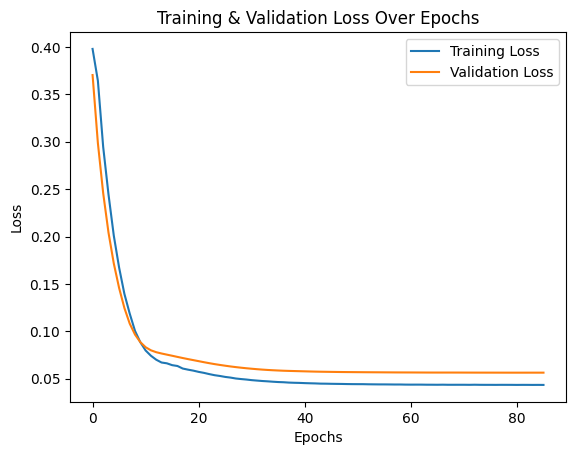

Training complete! Best model saved as 'best_lstm_model_100.pth'.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Convert data to PyTorch tensors
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i : i + seq_length])
        labels.append(data[i + seq_length])
    return torch.tensor(sequences, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32)

# Define sequence length
seq_length = 12
X, y = create_sequences(faers_scaled_df.values, seq_length)

# Split data into training (80%) and validation (20%)
train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:], y[train_size:]

# Convert to DataLoader for batch training
batch_size = 32
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)

# Define enhanced LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=100, num_layers=3, dropout=0.3):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout)
        self.layer_norm = nn.LayerNorm(hidden_size)  # Layer normalization for stability
        self.fc = nn.Linear(hidden_size, input_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = self.layer_norm(lstm_out[:, -1])  # Normalize before FC layer
        return self.fc(lstm_out)

# Initialize model
input_size = faers_scaled_df.shape[1]
model = LSTMModel(input_size).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Training loop with validation and early stopping
num_epochs = 100
loss_history = []
val_loss_history = []
best_val_loss = float('inf')
early_stop_count = 0
early_stop_patience = 5  # Stop if no improvement for 5 epochs

for epoch in range(num_epochs):
    model.train()
    train_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Calculate average training loss
    train_loss /= len(train_loader)
    loss_history.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            val_output = model(X_batch)
            loss = criterion(val_output, y_batch)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_loss_history.append(val_loss)

    # Adjust learning rate based on validation loss
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}")

    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_count = 0
        torch.save(model.state_dict(), "best_lstm_model.pth")  # Save the best model
    else:
        early_stop_count += 1

    if early_stop_count >= early_stop_patience:
        print("Early stopping triggered. Training stopped.")
        break

# Plot training & validation loss
plt.plot(loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss Over Epochs")
plt.show()

print("Training complete! Best model saved as 'best_lstm_model_100.pth'.")


In [ ]:

# Load the saved model
model.load_state_dict(torch.load("best_lstm_model.pth"))
model.eval()


<ipython-input-8-47490c3e85d0>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_lstm_model.pth"))


LSTMModel(
  (lstm): LSTM(98963, 100, num_layers=3, batch_first=True, dropout=0.3)
  (layer_norm): LayerNorm((100,), eps=1e-05, elementwise_affine=True)
  (fc): Linear(in_features=100, out_features=98963, bias=True)
)

In [ ]:
# Move model to the correct device
model.to(device)

# Generate predictions
predictions = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        output = model(X_batch)
        predictions.append(output.cpu().numpy())
        actuals.append(y_batch.cpu().numpy())

# Convert to NumPy arrays
predictions = np.vstack(predictions)
actuals = np.vstack(actuals)


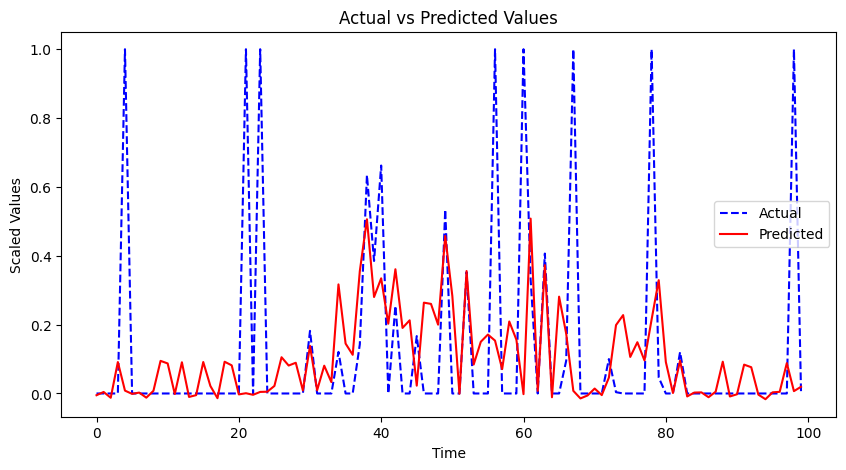

In [ ]:
plt.figure(figsize=(10, 5))

# Reduce to first sequence and first 1000 time steps
actual_sample = actuals[0, :100]
predicted_sample = predictions[0, :100]

plt.plot(actual_sample, label="Actual", linestyle='dashed', color='blue')
plt.plot(predicted_sample, label="Predicted", linestyle='solid', color='red')

plt.xlabel("Time")
plt.ylabel("Scaled Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()
